# Visualize Carla Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import patches
from PIL import Image

from carla_dataset import CarlaDataset, CarlaObjcdDataset, CarlaCdDataset

# Visualize bounding boxes and instance masks of `CARLADataset`

`CarlaDataset` returns a single image and its labels. The labels include class labels, bounding boxes, and instance masks of objects in the image.

In [3]:
dataset = CarlaDataset('../data/', mask=True)

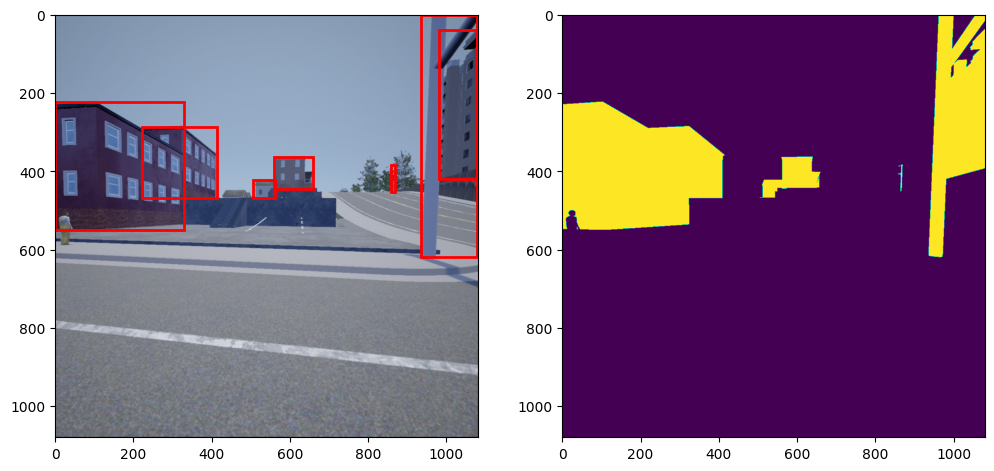

In [4]:
img, targets = dataset[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)

mask_arr = np.zeros((img.size[1], img.size[0]), dtype=np.uint8)
for i in range(len(targets['boxes'])):
    box = targets['boxes'][i]
    mask = targets['masks'][i]

    # add bbox to RGB image
    p = patches.Rectangle(
        (box[0], box[1]),
        box[2] - box[0],
        box[3] - box[1],
        linewidth=2,
        edgecolor='red',
        facecolor='none',
    )
    axes[0].add_patch(p)
    
    # merge mask
    mask_arr = mask_arr + mask.numpy()
    
axes[1].imshow(mask_arr)
plt.show()

# Visualize object-level change labels of `CARAObjcdDataset`

`CarlaCdDataset` returns a single **image pair** and its object-level change labels.

In [6]:
carla_objcd_dataset = CarlaObjcdDataset('../data')

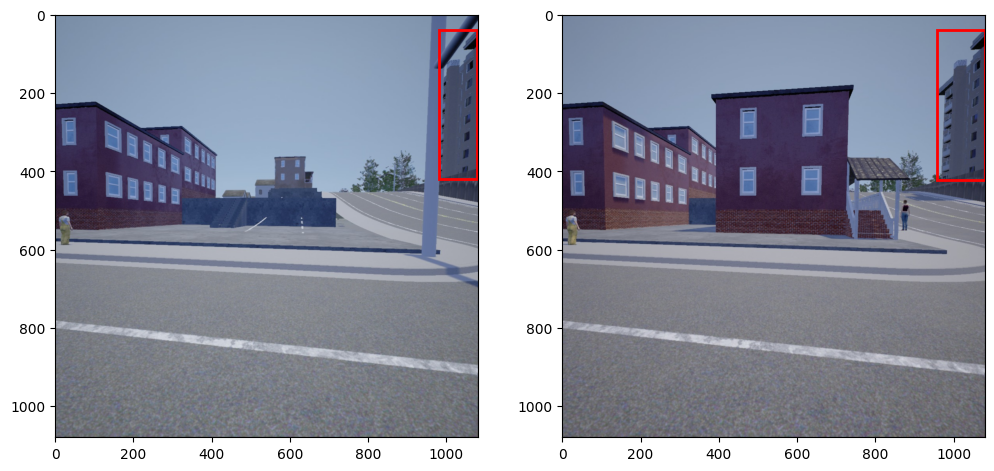

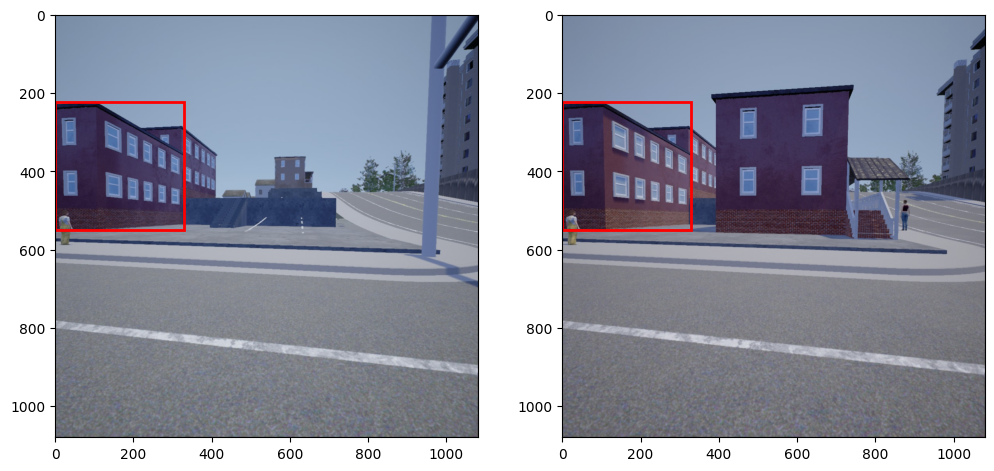

In [7]:
# Show not-changed objects
old_img, new_img, old_targets, new_targets, s = carla_objcd_dataset[0]

old_boxes = old_targets["boxes"].numpy()
new_boxes = new_targets["boxes"].numpy()
for i in range(len(s) - 1):
    for j in range(len(s[0]) - 1):
        if s[i, j] == 0:
            continue

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(old_img)
        axes[1].imshow(new_img)

        old_box = old_boxes[i]
        p = patches.Rectangle(
            (old_box[0], old_box[1]),
            old_box[2] - old_box[0],
            old_box[3] - old_box[1],
            linewidth=2,
            edgecolor='red',
            facecolor='none',
        )
        axes[0].add_patch(p)

        new_box = new_boxes[j]
        p = patches.Rectangle(
            (new_box[0], new_box[1]),
            new_box[2] - new_box[0],
            new_box[3] - new_box[1],
            linewidth=2,
            edgecolor='red',
            facecolor='none',
        )
        axes[1].add_patch(p)

        plt.show()
        break

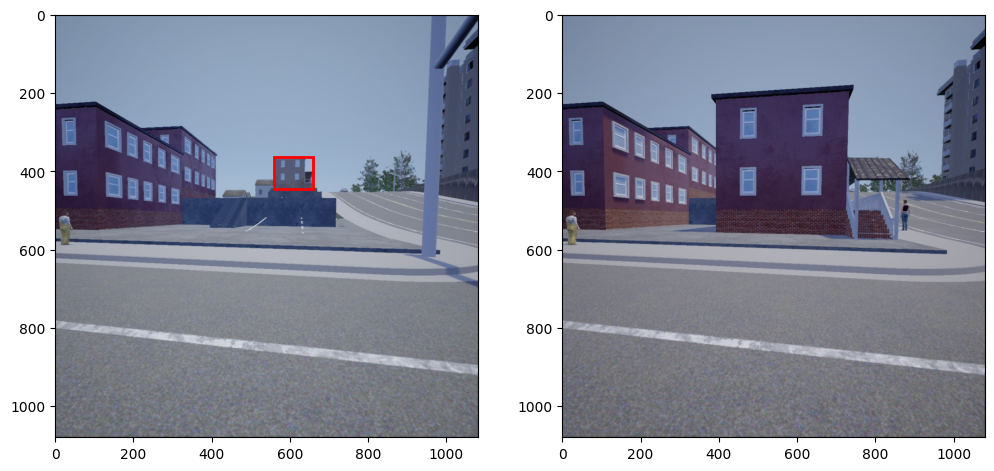

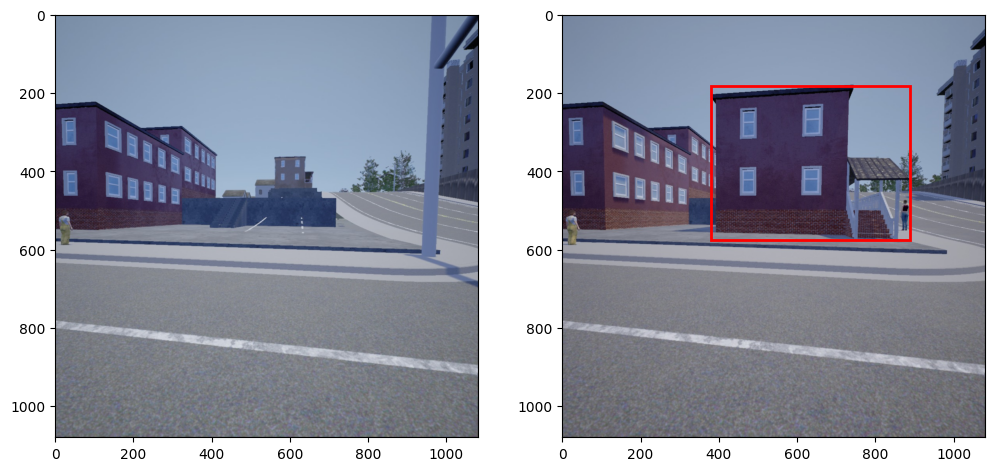

In [8]:
# Show changed objects
old_img, new_img, old_targets, new_targets, s = carla_objcd_dataset[0]

old_boxes = old_targets["boxes"].numpy()
new_boxes = new_targets["boxes"].numpy()

# Show changes in before image
for i in range(len(s) - 1):
    if s[i, -1] == 0:
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(old_img)
    axes[1].imshow(new_img)

    old_box = old_boxes[i]
    p = patches.Rectangle(
        (old_box[0], old_box[1]),
        old_box[2] - old_box[0],
        old_box[3] - old_box[1],
        linewidth=2,
        edgecolor='red',
        facecolor='none',
    )
    axes[0].add_patch(p)

    plt.show()
    
# Show changes in after image
for j in range(len(s[0]) - 1):
    if s[-1, j] == 0:
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(old_img)
    axes[1].imshow(new_img)

    new_box = new_boxes[j]
    p = patches.Rectangle(
        (new_box[0], new_box[1]),
        new_box[2] - new_box[0],
        new_box[3] - new_box[1],
        linewidth=2,
        edgecolor='red',
        facecolor='none',
    )
    axes[1].add_patch(p)

    plt.show()

# Visualize change masks of `CARLACdDataset`

`CarlaCdDataset` returns a single **image pair** and semantic change masks.

In [10]:
carla_cd_dataset = CarlaCdDataset('../data')

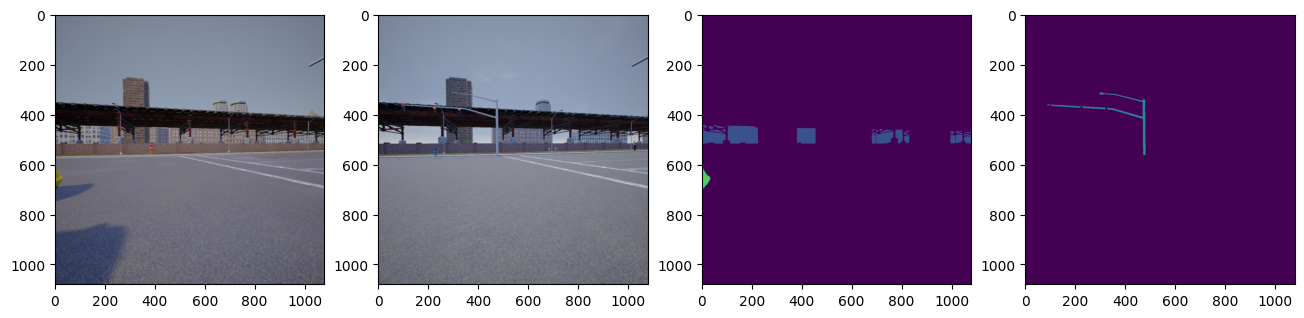

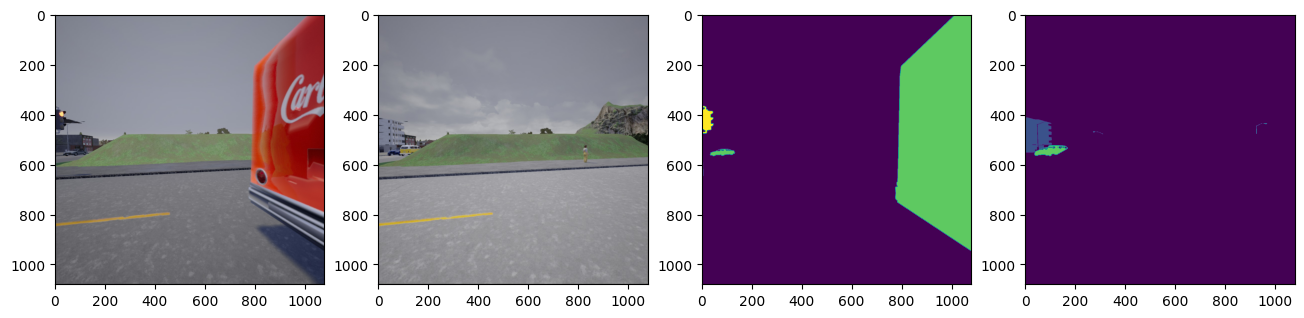

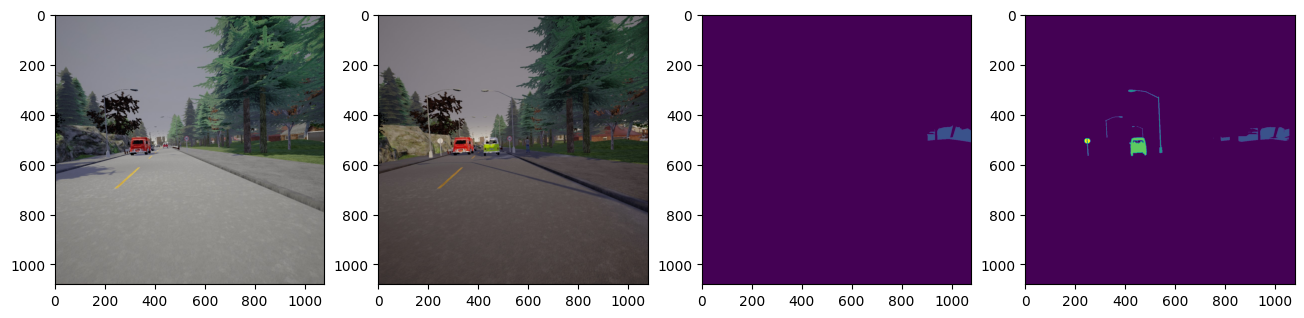

In [13]:
for i in range(5):
    old_img, new_img, old_chmask, new_chmask = carla_cd_dataset[i]
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(old_img)
    axes[1].imshow(new_img)
    axes[2].imshow(np.array(old_chmask), vmin=0, vmax=4)
    axes[3].imshow(np.array(new_chmask), vmin=0, vmax=4)
    plt.show()